In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pygad
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your data
data = pd.read_csv('all_grains_data.csv')


# Convert your categorical target variable into numerical
data

,ticker,commodity,date,open,high,low,close,volume
0,ZC=F,Corn,2000-07-17,182.25,182.25,178.25,179.25,19385
1,ZC=F,Corn,2000-07-18,179.00,183.25,179.00,180.75,25205
2,ZC=F,Corn,2000-07-19,180.00,182.75,178.75,182.00,17126
3,ZC=F,Corn,2000-07-20,181.50,187.00,181.00,186.00,18742
4,ZC=F,Corn,2000-07-21,185.50,188.00,185.00,187.75,16814
...,...,...,...,...,...,...,...,...
34854,ZS=F,Soybean,2023-09-05,1359.50,1359.50,1348.00,1349.00,85
34855,ZS=F,Soybean,2023-09-06,1365.50,1365.50,1359.50,1360.25,102
34856,ZS=F,Soybean,2023-09-07,1349.50,1350.00,1345.00,1345.00,310
34857,ZS=F,Soybean,2023-09-08,1339.00,1349.50,1339.00,1349.50,198


Iteration: 10
Best fitness: -2000000
Iteration: 20
Best fitness: -2000000
Iteration: 30
Best fitness: -2000000
Iteration: 40
Best fitness: -2000000
Iteration: 50
Best fitness: -2000000
Iteration: 60
Best fitness: -2000000
Iteration: 70
Best fitness: -2000000
Iteration: 80
Best fitness: -2000000
Iteration: 90
Best fitness: -2000000
Iteration: 100
Best fitness: -2000000


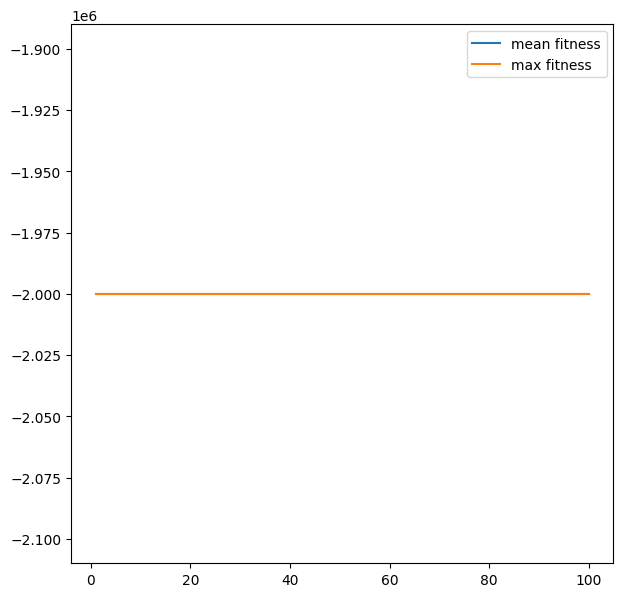


#############################
#			STATS			#
#############################


Total running time: 3 minutes, 56 seconds


Population size: 50
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.1
Number Generations: 100

Best fitness: -2000000
Best individual: [-6.40511356 -0.25371441  5.95304356 -4.35585527]
Best combination of dates: None


In [55]:
from geneal.genetic_algorithms import ContinuousGenAlgSolver, BinaryGenAlgSolver
from geneal.applications.fitness_functions.continuous import fitness_functions_continuous


class TemplateChildClass(ContinuousGenAlgSolver, BinaryGenAlgSolver):
    def __init__(self, *args, **kwargs):
        BinaryGenAlgSolver.__init__(self, *args, **kwargs)
        ContinuousGenAlgSolver.__init__(self, *args, **kwargs)

    def fitness_function(self, chromosome):
        """
        Implements the logic that calculates the fitness
        measure of an individual.

        :param chromosome: chromosome of genes representing an individual
        :return: the fitness of the individual
        """
        pass

    def initialize_population(self):
        """
        Initializes the population of the problem

        :param pop_size: number of individuals in the population
        :param n_genes: number of genes representing the problem. In case of the binary
        solver, it represents the number of genes times the number of bits per gene
        :return: a numpy array with a randomized initialized population
        """
        pass

soybean_data = data[data['ticker'] == 'ZS=F']
corn_data = data[data['ticker'] == 'ZC=F']

# Merge soybean and corn data based on date
merged_data = pd.merge(soybean_data[['date', 'close']], corn_data[['date', 'close']], on='date', suffixes=('_soy', '_corn'))

def calculate_total_cost(dates):
    total_cost = 0
    for date in dates:
        row = merged_data[merged_data['date'] == date]
        if not row.empty:
            total_cost += row.iloc[0]['close_soy'] + row.iloc[0]['close_corn']
    return total_cost

# Define the fitness function for the genetic algorithm
def fitness_function(chromosome):
    total_cost = calculate_total_cost(chromosome)
    # Penalty for solutions not meeting the cost constraint
    penalty = max(0, 2000 - total_cost) * 1000  # Penalize under-cost solutions heavily
    return -1 * (total_cost + penalty)  # Minimize total cost while meeting the constraint
solver = ContinuousGenAlgSolver(
    n_genes=1 # number of variables defining the problem
    fitness_function=fitness_function, # fitness function to be maximized
    pop_size=50,
    max_gen=100,
    mutation_rate=0.1
)

best_dates = solver.solve()
print("Best combination of dates:", best_dates)